In [1]:
import pandas as pd

df = pd.read_excel('Korelasi.xlsx')

# Cek nama kolom secara lengkap
for col in df.columns:
    print(repr(col))


'year'
'month'
'weather_ct'
'weather_ct.1'


Korelasi Pearson weather_ct ORD vs MIA: 0.814754091784695


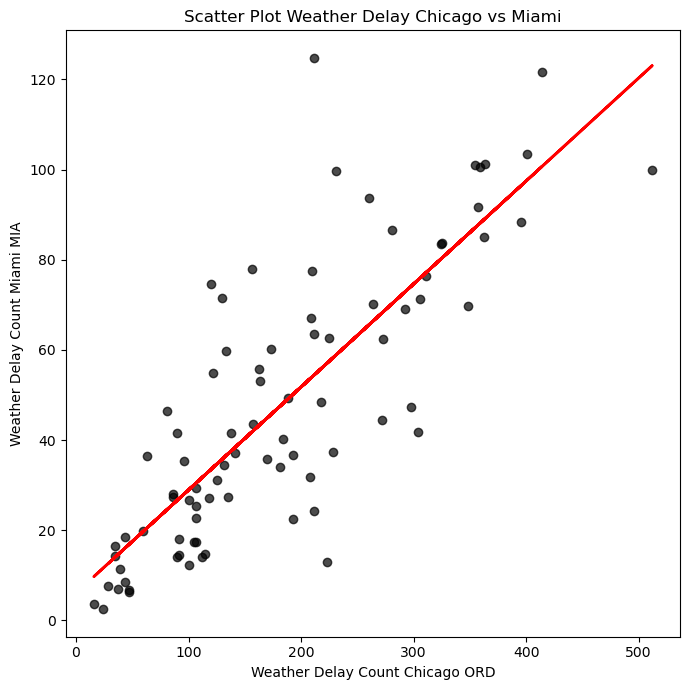

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === 1. Baca data ===
chicago = pd.read_csv("Chicago Airline.csv", sep=";")
miami   = pd.read_csv("Miami Airline_Delay_Cause.csv", sep=";")

# === 2. Agregasi weather_ct per bulan ===
chicago_monthly = chicago.groupby(["year","month"], as_index=False)["weather_ct"].sum()
miami_monthly   = miami.groupby(["year","month"], as_index=False)["weather_ct"].sum()

# === 3. Gabungkan berdasarkan YEAR dan MONTH ===
df = pd.merge(chicago_monthly, miami_monthly, on=["year","month"], suffixes=("_ORD","_MIA"))

# === 4. Hitung korelasi Pearson ===
corr_value = df["weather_ct_ORD"].corr(df["weather_ct_MIA"], method="pearson")
print("Korelasi Pearson weather_ct ORD vs MIA:", corr_value)

# === 5. Scatter plot ORD vs MIA ===
plt.figure(figsize=(7,7))
plt.scatter(df["weather_ct_ORD"], df["weather_ct_MIA"], color="black", alpha=0.7)
plt.xlabel("Weather Delay Count Chicago ORD")
plt.ylabel("Weather Delay Count Miami MIA")
plt.title("Scatter Plot Weather Delay Chicago vs Miami")

# Tambahkan garis regresi linear
x = df["weather_ct_ORD"]
y = df["weather_ct_MIA"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red", linewidth=2)

plt.tight_layout()
plt.show()

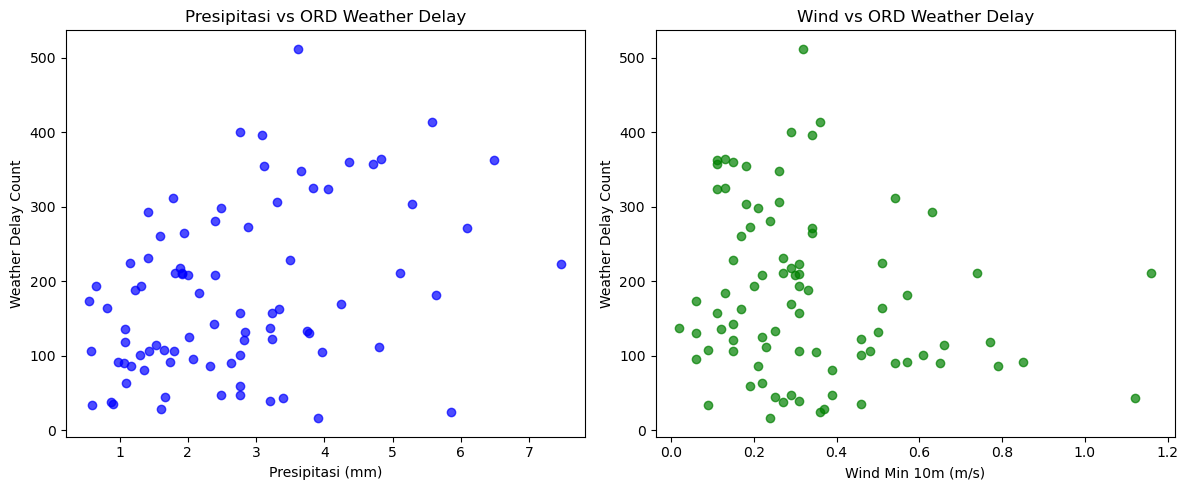

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Baca data ===
climate = pd.read_csv("DATACHICAGOBULANAN.csv", sep=";")
airline = pd.read_csv("Chicago Airline.csv", sep=";")

# === 2. Ubah data iklim ke format long ===
climate_long = climate.melt(id_vars=["PARAMETER","YEAR"], 
                            var_name="MONTH", value_name="VALUE")

# Konversi nama bulan ke angka
month_map = {"JAN":1,"FEB":2,"MAR":3,"APR":4,"MAY":5,"JUN":6,
             "JUL":7,"AUG":8,"SEP":9,"OCT":10,"NOV":11,"DEC":12}
climate_long["MONTH"] = climate_long["MONTH"].map(month_map)

# Pisahkan presipitasi dan angin
precip = climate_long[climate_long["PARAMETER"]=="PRECTOTCORR"].rename(columns={"VALUE":"PRECIP"})
wind   = climate_long[climate_long["PARAMETER"]=="WS10M_MIN"].rename(columns={"VALUE":"WIND"})

# Gabungkan data iklim
climate_data = pd.merge(precip[["YEAR","MONTH","PRECIP"]],
                        wind[["YEAR","MONTH","WIND"]],
                        on=["YEAR","MONTH"])

# === 3. Agregasi delay pesawat per bulan ===
airline_monthly = airline.groupby(["year","month"], as_index=False)["weather_ct"].sum()
airline_monthly.rename(columns={"year":"YEAR","month":"MONTH","weather_ct":"WEATHER_CT"}, inplace=True)

# === 4. Gabungkan ===
df = pd.merge(climate_data, airline_monthly, on=["YEAR","MONTH"])

# === 5. Visualisasi scatter plot ===
plt.figure(figsize=(12,5))

# Scatter presipitasi vs delay
plt.subplot(1,2,1)
plt.scatter(df["PRECIP"], df["WEATHER_CT"], color="blue", alpha=0.7)
plt.xlabel("Presipitasi (mm)")
plt.ylabel("Weather Delay Count")
plt.title("Presipitasi vs ORD Weather Delay")

# Scatter angin vs delay
plt.subplot(1,2,2)
plt.scatter(df["WIND"], df["WEATHER_CT"], color="green", alpha=0.7)
plt.xlabel("Wind Min 10m (m/s)")
plt.ylabel("Weather Delay Count")
plt.title("Wind vs ORD Weather Delay")

plt.tight_layout()
plt.show()

Korelasi antar variabel:
              PRECIP      WIND  WEATHER_CT
PRECIP      1.000000 -0.240925    0.233681
WIND       -0.240925  1.000000   -0.066344
WEATHER_CT  0.233681 -0.066344    1.000000


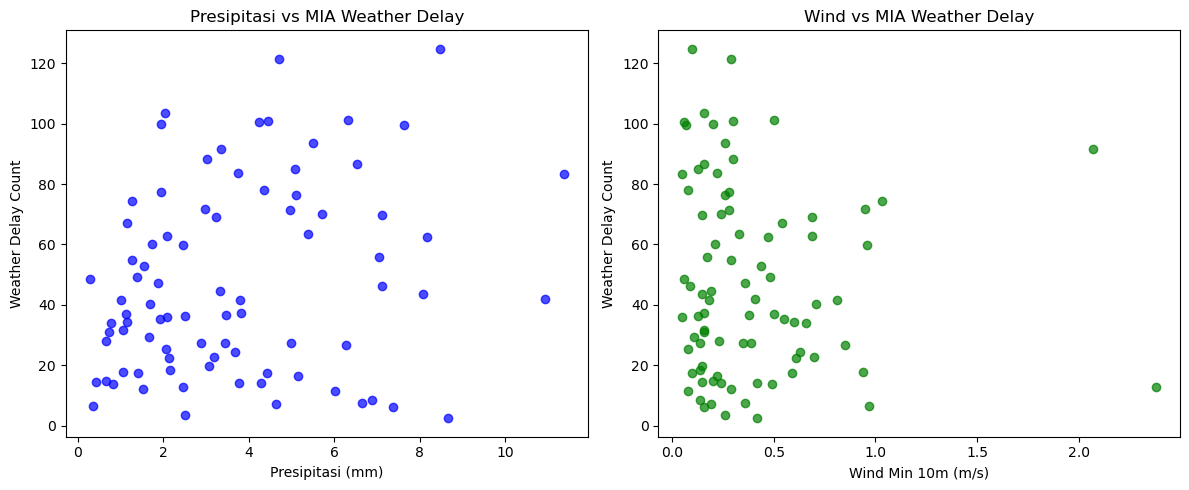

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Baca data ===
climate_mia = pd.read_csv("DATAMIAMIBULANAN.csv", sep=";")
airline_mia = pd.read_csv("Miami Airline_Delay_Cause.csv", sep=";")

# === 2. Ubah data iklim ke format long ===
climate_long = climate_mia.melt(id_vars=["PARAMETER","YEAR"], 
                                var_name="MONTH", value_name="VALUE")

month_map = {"JAN":1,"FEB":2,"MAR":3,"APR":4,"MAY":5,"JUN":6,
             "JUL":7,"AUG":8,"SEP":9,"OCT":10,"NOV":11,"DEC":12}
climate_long["MONTH"] = climate_long["MONTH"].map(month_map)

# Pisahkan presipitasi dan angin
precip = climate_long[climate_long["PARAMETER"]=="PRECTOTCORR"].rename(columns={"VALUE":"PRECIP"})
wind   = climate_long[climate_long["PARAMETER"]=="WS10M_MIN"].rename(columns={"VALUE":"WIND"})

# Gabungkan data iklim
climate_data = pd.merge(precip[["YEAR","MONTH","PRECIP"]],
                        wind[["YEAR","MONTH","WIND"]],
                        on=["YEAR","MONTH"])

# === 3. Agregasi delay pesawat per bulan ===
airline_monthly = airline_mia.groupby(["year","month"], as_index=False)["weather_ct"].sum()
airline_monthly.rename(columns={"year":"YEAR","month":"MONTH","weather_ct":"WEATHER_CT"}, inplace=True)

# === 4. Gabungkan ===
df = pd.merge(climate_data, airline_monthly, on=["YEAR","MONTH"])

# === 5. Hitung korelasi Pearson ===
print("Korelasi antar variabel:")
print(df[["PRECIP","WIND","WEATHER_CT"]].corr(method="pearson"))

# === 6. Visualisasi scatter plot ===
plt.figure(figsize=(12,5))

# Scatter presipitasi vs delay
plt.subplot(1,2,1)
plt.scatter(df["PRECIP"], df["WEATHER_CT"], color="blue", alpha=0.7)
plt.xlabel("Presipitasi (mm)")
plt.ylabel("Weather Delay Count")
plt.title("Presipitasi vs MIA Weather Delay")

# Scatter angin vs delay
plt.subplot(1,2,2)
plt.scatter(df["WIND"], df["WEATHER_CT"], color="green", alpha=0.7)
plt.xlabel("Wind Min 10m (m/s)")
plt.ylabel("Weather Delay Count")
plt.title("Wind vs MIA Weather Delay")

plt.tight_layout()
plt.show()